In [1]:
from wy_baseline import wy_tradegy, selc_func
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

## import data

In [2]:
data = pd.read_csv('../data/processed.csv')
from datetime import datetime
data['date'] = pd.to_datetime(data['date'])
data = data.loc[data['date'] >= pd.to_datetime('2020-01-09')]
data = data.loc[data['date'] <= pd.to_datetime('2022-10-28')]
predict = pd.read_csv('../data/predict.csv')
predict = predict[:len(data)]

In [3]:
open_truth = list(predict['open_truth'])
close_truth = list(predict['close_truth'])
high = list(predict['high'])
high_truth = list(predict['high_truth'])
low = list(predict['low'])
low_truth = list(predict['low_truth'])
open = list(predict['open'])
close = list(predict['close'])

## trading

2.3614829013845053


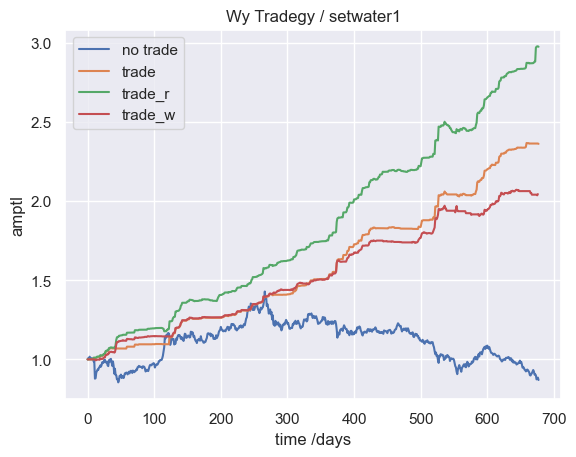

In [4]:
rk = 1.0
rk_list = []
rkr = 1.0
rk_listr = []
rkw = 1.0
rk_listw = []
amp_list = []
water = 0.8
window = 5
out_flag = 0
bias = 50
for i in range(len(open_truth)-1):
    water *= open[i+1]/open[i]
    water = min(water, 1)
    water = max(water, 0)
    fixedrate = open_truth[i]/open[i]
    amptl = wy_tradegy(high[i]+bias, low[i]-bias, high_truth[i], low_truth[i], open_truth[i], close_truth[i], water)
    if (amptl<1):
        out_flag = sum(amp_list[-window:]) / window
    amp_list.append(amptl)
    if (out_flag < 1):
        amptl = 1
        
    rkw *=amptl
    if (out_flag>1):
        # 万1.1手续费
        rkw*= 0.99989
    rk_listw.append(rkw)

amp_list = []
water = 0.8

for i in range(len(open_truth)):
    fixedrate = open_truth[i]/open[i]
    amptl = wy_tradegy(high[i]+bias, low[i]-bias, high_truth[i], low_truth[i], open_truth[i], close_truth[i], water)
    if (amptl<1):
        out_flag = sum(amp_list[-window:]) / window
    amp_list.append(amptl)
    if (out_flag < 1):
        amptl = 1
        
    rk *=amptl
    if (out_flag>1):
        # 万1.1手续费
        rk*= 0.99989
    rk_list.append(rk)

amp_list = []

for i in range(len(open_truth)):
    amptl = wy_tradegy(high[i]+bias, low[i]-bias, high_truth[i], low_truth[i], open_truth[i], close_truth[i], water)
    rkr*=amptl
    rk_listr.append(rkr)


plt.plot(np.array(open_truth)/open_truth[0], label='no trade')

print(rk)
plt.plot(rk_list, label='trade')
plt.plot(rk_listr, label='trade_r')
plt.plot(rk_listw, label='trade_w')
plt.title('Wy Tradegy / setwater{}'.format(water))
plt.xlabel('time /days')
plt.ylabel('amptl')
plt.legend()
plt.show()

## set different water to check the results

In [5]:
def set(x):
    rk = 1.0
    #print(wy_tradegy(1, 0.8, 1, 0.4, 0.5, 0.5, 0.5))
    for i in range(len(open_truth)):
        amptl = wy_tradegy(high[i], low[i], high_truth[i], low_truth[i], open_truth[i], close_truth[i], x)
        #amptl = wy_tradegy(open_truth[i] + (high[i] - low[i]) / 2, open_truth[i] - (high[i] - low[i]) / 2, high_truth[i], low_truth[i], open_truth[i], close_truth[i], 0.5)
        rk *=amptl
            # 万1.1手续费
        rk*= 0.99989

    return rk

Text(0.5, 0, 'setwater')

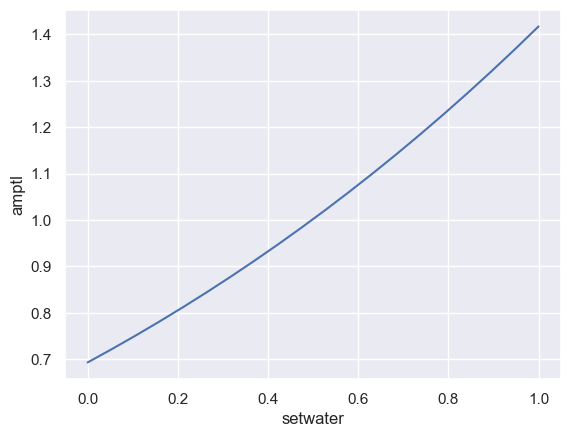

In [6]:
plt.plot(np.linspace(0,1,20), [set(x/100) for x in range(0,100,5)])
plt.ylabel('amptl')
plt.xlabel('setwater')